# MyND Offline Processing: Data Analysis
Author: Geeling Chau<br> 
<br>
Description: Visualize power bin features<br>
Sources: 
- Ollie's Segment Speller Offline Processing Code https://github.com/ollie-d/SegSpeller/blob/master/Offline%20Processing.ipynb 
- neurodsp https://github.com/neurodsp-tools/neurodsp
- FOOOF https://fooof-tools.github.io/fooof/index.html 
- PyEEG http://pyeeg.sourceforge.net/ 


## Imports

In [4]:
from helperFunctions import *
from constants import *
from dataAnalysisFunctions import *

from neurodsp.plts.spectral import *

import warnings
warnings.filterwarnings('ignore')

## Data imports

In [5]:
filename_foldername_dict_path = "../data/most_currently_updated.pickle"
filename_foldername_dict = loadPickle(filename_foldername_dict_path)

foldername=filename_foldername_dict["foldername"]
filename=filename_foldername_dict["filename"]
print(foldername, filename)

dataframe_directory = "../data/dataframe/"+foldername+"/"
dataframe_path = dataframe_directory+filename+".pickle"

df = loadPickle(dataframe_path)

P005 participant_P005_exp001_block_long


In [6]:
filtered_cleaned_data_directory = "../data/filtered_cleaned_data/"+foldername+"/"
filtered_cleaned_data_path = filtered_cleaned_data_directory+filename+".pickle"

filtered_cleaned_data = loadPickle(filtered_cleaned_data_path)

In [18]:
# Create a binning interval
binning=list(np.arange(.5, 30, 2))
intervals = getIntervals(binning)

In [19]:
# Get sections
numSections = getNumSections(filtered_cleaned_data)
article_sections = list()
for i in range(numSections) : 
    article_sections.append(getArticleSectionData("response", i, filtered_cleaned_data))


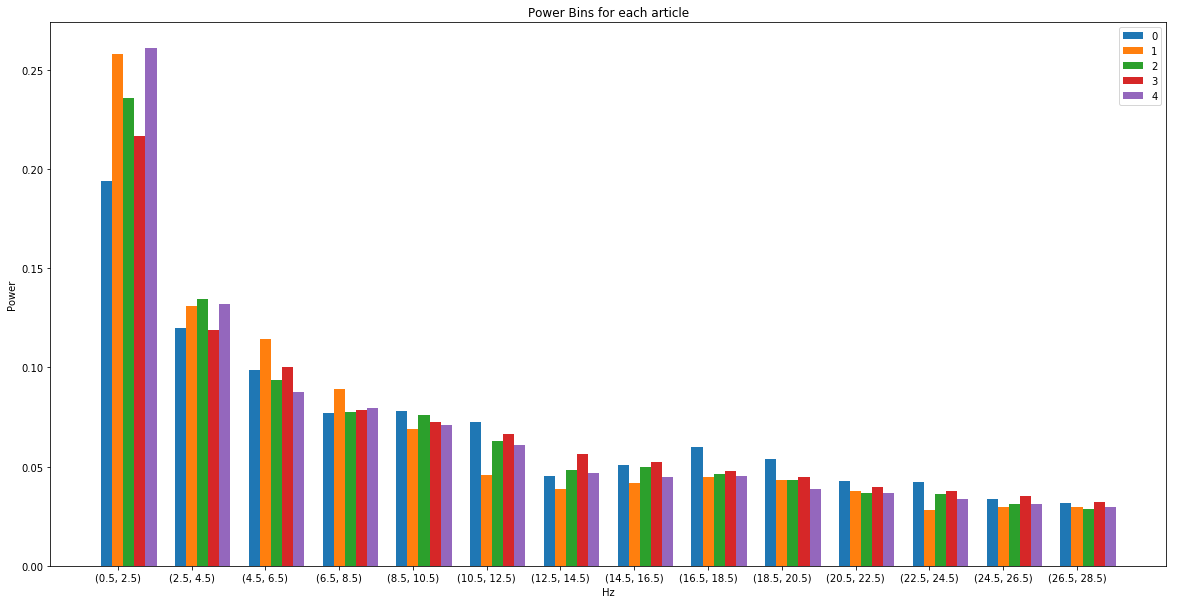

In [20]:
# Plot power bins for each article
power_ratios = list()
for article_section in article_sections: 
    power_ratio = getPowerRatio(article_section[StreamType.EEG.value][StreamType.DATA.value][:,channels['right_eeg']], binning)
    power_ratios.append(power_ratio)

plt.figure(figsize=(20,10))
plotMultipleBarGraphs(power_ratios, 0.15, list(range(len(article_sections))), intervals, title="Power Bins for each article", xlabel="Hz", ylabel="Power")



In [21]:
# Calculate power ratio from data frame for different trial groups

unfocused_df = df[((df["is_pressed"] == False) & (df["is_target"] == True))]
unfocused_data = unfocused_df["data"].values
unfocused_windows = getWindowsList(unfocused_df)
unfocused_freqs, unfocused_psds, unfocused_psd_avg = getFreqsAndPSD(unfocused_windows) 
unfocused_power_ratio = [getPowerRatio(data[:499], binning) for data in unfocused_windows]

unfocused_sem = getSEM(unfocused_power_ratio)
unfocused_power_ratio_avg = np.mean(unfocused_power_ratio, axis=0)



focused_df = df[((df["is_pressed"] == True) & (df["is_target"] == True))]
focused_data = focused_df["data"].values
focused_windows = getWindowsList(focused_df)
focused_freqs, focused_psds, focused_psd_avg = getFreqsAndPSD(focused_windows) 
focused_power_ratio = [getPowerRatio(data[:499], binning) for data in focused_windows]

focused_sem = getSEM(focused_power_ratio)
focused_power_ratio_avg = np.mean(focused_power_ratio, axis=0)


super_focused_df = df[((df["is_pressed"] == True) & (df["is_target"] == True) & (df["has_meme"] == True))]
super_focused_data = super_focused_df["data"].values
super_focused_windows = getWindowsList(super_focused_df)
super_focused_freqs, super_focused_psds, super_focused_psd_avg = getFreqsAndPSD(super_focused_windows) 
super_focused_power_ratio = [getPowerRatio(data[:499], binning) for data in super_focused_windows]

super_focused_sem = getSEM(super_focused_power_ratio)
super_focused_power_ratio_avg = np.mean(super_focused_power_ratio, axis=0)


super_unfocused_df = df[((df["is_pressed"] == False) & (df["is_target"] == True) & (df["has_meme"] == True))]
super_unfocused_data = super_unfocused_df["data"].values
super_unfocused_windows = getWindowsList(super_unfocused_df)
super_unfocused_freqs, super_unfocused_psds, super_unfocused_psd_avg = getFreqsAndPSD(super_unfocused_windows) 
super_unfocused_power_ratio = [getPowerRatio(data[:499], binning) for data in super_unfocused_windows]

super_unfocused_sem = getSEM(super_unfocused_power_ratio)
super_unfocused_power_ratio_avg = np.mean(super_unfocused_power_ratio, axis=0)


mispress_df = df[((df["is_pressed"] == True) & (df["is_target"] == False))]
mispress_data = mispress_df["data"].values
mispress_windows = getWindowsList(mispress_df)
mispress_freqs, mispress_psds, mispress_psd_avg = getFreqsAndPSD(mispress_windows) 
mispress_power_ratio = [getPowerRatio(data[:499], binning) for data in mispress_windows]

mispress_sem = getSEM(mispress_power_ratio)
mispress_power_ratio_avg = np.mean(mispress_power_ratio, axis=0)


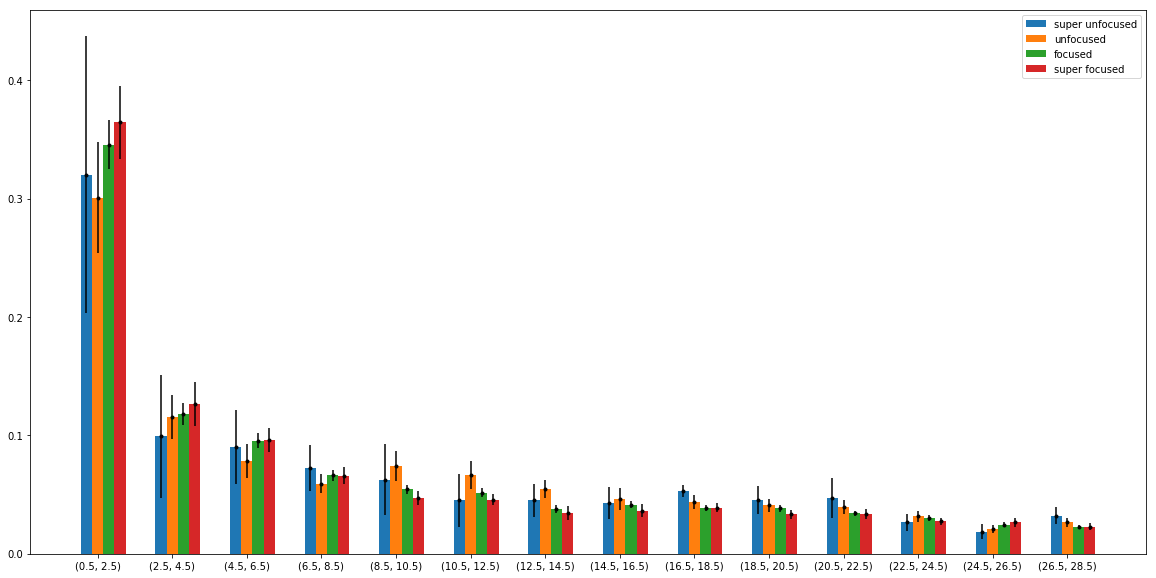

In [22]:
plt.figure(figsize=(20,10))

plotMultipleBarGraphs([super_unfocused_power_ratio_avg, unfocused_power_ratio_avg, focused_power_ratio_avg, super_focused_power_ratio_avg], 0.15, ["super unfocused","unfocused", "focused", "super focused"], intervals, error_values=[super_unfocused_sem, unfocused_sem, focused_sem, super_focused_sem])


